# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)
#print(cities)

867

In [4]:
# Create an "extracts" object to get the temperature, latitude,
# and longitude in each city


In [5]:
dataList = []
#summary = ['city',"country", "date","latitude","longitude,""temperature" ,"cloudiness","windSpeed"]
#api.openweathermap.org/data/2.5/weather?

for city in cities:
  
    cityurl = "http://api.openweathermap.org/data/2.5/weather?q="+city+"&appid="+api_key
    try:
        Resolves = requests.get(cityurl).json()
        print(Resolves)
        temperature = Resolves['main']['temp_max']
        humidity =Resolves['main']['humidity']
        cloudiness = Resolves['clouds']['all']
        windSpeed = Resolves['wind']['speed']
        latitude = Resolves['coord']['lon']
        longitude = Resolves['coord']['lat']
        #pprint(Resolves)
        country = Resolves['sys']['country']
        #CityID = Resolves['weather']['id']
        date = Resolves['dt']
        dataList.append({'city':city,'Country':country,'Date':date, 'Latitude':latitude,'Longitude': longitude, 'Temperature':temperature, 'Humidity':humidity,
                        'Cloudiness':cloudiness, 'Wind Speed': windSpeed } )
      
        
    except:
        print("City not Found")
        pass 
        
    
        

{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.08, 'pressure': 1015, 'humidity': 94, 'temp_min': 296.15, 'temp_max': 298.15}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 270}, 'clouds': {'all': 1}, 'dt': 1562349911, 'sys': {'type': 1, 'id': 7873, 'message': 0.0079, 'country': 'US', 'sunrise': 1562342311, 'sunset': 1562390691}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}
{'coord': {'lon': 36.26, 'lat': 47.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.441, 'pressure': 1012.5, 'humidity': 55, 'temp_min': 291.441, 'temp_max': 291.441, 'sea_level': 1012.5, 'grnd_level': 999.08}, 'wind': {'speed': 3, 'deg': 201.525}, 'clouds': {'all': 0}, 'dt': 1562349947, 'sys': {'message': 0.0063, 'country': 'UA', 'sunrise': 1562290989, 'sunset': 1562348124}, 'timezone': 1080

{'coord': {'lon': -105.84, 'lat': 46.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 295.15, 'pressure': 1021, 'humidity': 64, 'temp_min': 295.15, 'temp_max': 295.15}, 'visibility': 16093, 'wind': {'speed': 6.2, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1562349952, 'sys': {'type': 1, 'id': 4930, 'message': 0.0064, 'country': 'US', 'sunrise': 1562325429, 'sunset': 1562381900}, 'timezone': -21600, 'id': 5666176, 'name': 'Miles City', 'cod': 200}
{'coord': {'lon': -115.79, 'lat': 60.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.15, 'pressure': 1024, 'humidity': 60, 'temp_min': 293.15, 'temp_max': 293.15}, 'visibility': 24140, 'wind': {'speed': 3.6, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1562349952, 'sys': {'type': 1, 'id': 819, 'message': 0.0076, 'country': 'CA', 'sunrise': 1562322054, 'sunset': 1562390051}, 'timezon

{'coord': {'lon': -118.37, 'lat': 33.75}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 294.56, 'pressure': 1017, 'humidity': 64, 'temp_min': 291.48, 'temp_max': 297.59}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1562349957, 'sys': {'type': 1, 'id': 6037, 'message': 0.0244, 'country': 'US', 'sunrise': 1562330889, 'sunset': 1562382455}, 'timezone': -25200, 'id': 5386035, 'name': 'Rancho Palos Verdes', 'cod': 200}
{'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.82, 'pressure': 1020, 'humidity': 88, 'temp_min': 284.82, 'temp_max': 284.82}, 'wind': {'speed': 1.79, 'deg': 355, 'gust': 4.47}, 'clouds': {'all': 0}, 'dt': 1562349957, 'sys': {'type': 3, 'id': 2003650, 'message': 0.0066, 'country': 'ZA', 'sunrise': 1562305790, 'sunset': 1562341493}, 'timezone': 720

{'coord': {'lon': -46.03, 'lat': 60.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 293.15, 'pressure': 1020, 'humidity': 34, 'temp_min': 293.15, 'temp_max': 293.15}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1562349963, 'sys': {'type': 1, 'id': 47, 'message': 0.0077, 'country': 'GL', 'sunrise': 1562305365, 'sunset': 1562373251}, 'timezone': -7200, 'id': 3420846, 'name': 'Qaqortoq', 'cod': 200}
{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.242, 'pressure': 1008.15, 'humidity': 70, 'temp_min': 302.242, 'temp_max': 302.242, 'sea_level': 1008.15, 'grnd_level': 1008.21}, 'wind': {'speed': 2.94, 'deg': 8.017}, 'clouds': {'all': 62}, 'dt': 1562349916, 'sys': {'message': 0.0079, 'country': 'KI', 'sunrise': 1562351070, 'sunset': 1562395322}, 'tim

{'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.99, 'pressure': 1022, 'humidity': 72, 'temp_min': 289.82, 'temp_max': 290.15}, 'visibility': 24140, 'wind': {'speed': 4.1, 'deg': 250}, 'clouds': {'all': 90}, 'dt': 1562349923, 'sys': {'type': 1, 'id': 1007, 'message': 0.007, 'country': 'CA', 'sunrise': 1562320424, 'sunset': 1562391005}, 'timezone': -21600, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': -74.98, 'lat': 39.31}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 303.92, 'pressure': 1019, 'humidity': 79, 'temp_min': 300.37, 'temp_max': 307.04}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 90, 'gust': 5.7}, 'rain': {'3h': 0.563}, 'clouds': {'all': 18}, 'dt': 1562349967, 'sys': {'type': 1, 'id': 9

{'coord': {'lon': 4.24, 'lat': 48.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.2, 'pressure': 1016, 'humidity': 23, 'temp_min': 302.15, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1562349972, 'sys': {'type': 1, 'id': 6535, 'message': 0.0074, 'country': 'FR', 'sunrise': 1562298331, 'sunset': 1562356153}, 'timezone': 7200, 'id': 2995603, 'name': 'Saint-Pierre', 'cod': 200}
{'coord': {'lon': 27.35, 'lat': 70.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 310, 'main': 'Drizzle', 'description': 'light intensity drizzle rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.49, 'pressure': 1005, 'humidity': 93, 'temp_min': 280.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1562349973, 'sys': {'type': 1, 'id': 1633, 'message

{'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.15, 'pressure': 1019, 'humidity': 81, 'temp_min': 280.15, 'temp_max': 280.15}, 'visibility': 8000, 'wind': {'speed': 5.7, 'deg': 280, 'gust': 11.3}, 'clouds': {'all': 90}, 'dt': 1562349946, 'sys': {'type': 1, 'id': 8408, 'message': 0.0063, 'country': 'BR', 'sunrise': 1562322561, 'sunset': 1562358970}, 'timezone': -10800, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}
{'coord': {'lon': 28.78, 'lat': -12.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 292.042, 'pressure': 1016.59, 'humidity': 45, 'temp_min': 292.042, 'temp_max': 292.042, 'sea_level': 1016.59, 'grnd_level': 875.05}, 'wind': {'speed': 1.77, 'deg': 117.987}, 'clouds': {'all': 42}, 'dt': 1562349978, 'sys': {'message': 0.0059, 'country': 'CD', 'sunrise': 15

{'coord': {'lon': -69.22, 'lat': -51.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 283.15, 'pressure': 1008, 'humidity': 86, 'temp_min': 283.15, 'temp_max': 283.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1562349983, 'sys': {'type': 1, 'id': 8293, 'message': 0.0074, 'country': 'AR', 'sunrise': 1562330559, 'sunset': 1562359191}, 'timezone': -10800, 'id': 3838859, 'name': 'Rio Gallegos', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': 152.91, 'lat': -31.43}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 284.38, 'pressure': 1033, 'humidity': 100, 'temp_min': 283.15, 'temp_max': 284.82}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1562349984, 'sys': {'type': 1, 'id': 9610, 'message': 0.0068

{'coord': {'lon': -39.27, 'lat': -3.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 302.941, 'pressure': 1013.26, 'humidity': 59, 'temp_min': 302.941, 'temp_max': 302.941, 'sea_level': 1013.26, 'grnd_level': 992.66}, 'wind': {'speed': 3.66, 'deg': 79.288}, 'rain': {'3h': 0.188}, 'clouds': {'all': 22}, 'dt': 1562349988, 'sys': {'message': 0.0067, 'country': 'BR', 'sunrise': 1562316201, 'sunset': 1562359171}, 'timezone': -10800, 'id': 3386177, 'name': 'Trairi', 'cod': 200}
{'coord': {'lon': 150.8, 'lat': -2.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.441, 'pressure': 1009.06, 'humidity': 74, 'temp_min': 301.441, 'temp_max': 301.441, 'sea_level': 1009.06, 'grnd_level': 1008.29}, 'wind': {'speed': 3.82, 'deg': 159}, 'clouds': {'all': 94}, 'dt': 1562349988, 'sys': {'message': 0.0057, 'country': 'PG', 'sunrise': 1562356

{'coord': {'lon': -54.34, 'lat': -34.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 280.441, 'pressure': 1023.2, 'humidity': 73, 'temp_min': 280.441, 'temp_max': 280.441, 'sea_level': 1023.2, 'grnd_level': 1009.19}, 'wind': {'speed': 8.12, 'deg': 219.458}, 'clouds': {'all': 95}, 'dt': 1562349993, 'sys': {'message': 0.0096, 'country': 'UY', 'sunrise': 1562323457, 'sunset': 1562359149}, 'timezone': -10800, 'id': 3440777, 'name': 'Rocha', 'cod': 200}
{'coord': {'lon': -108.41, 'lat': 49.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 292.142, 'pressure': 1022.67, 'humidity': 62, 'temp_min': 292.142, 'temp_max': 292.142, 'sea_level': 1022.67, 'grnd_level': 923.41}, 'wind': {'speed': 4.97, 'deg': 87.684}, 'clouds': {'all': 71}, 'dt': 1562349993, 'sys': {'message': 0.0065, 'country': 'CA', 'sunrise': 1562325183, 'sunset':

{'coord': {'lon': -46, 'lat': -20.63}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 290.941, 'pressure': 1015.2, 'humidity': 89, 'temp_min': 290.941, 'temp_max': 290.941, 'sea_level': 1015.2, 'grnd_level': 907.45}, 'wind': {'speed': 4.69, 'deg': 271.356}, 'rain': {'3h': 2.126}, 'clouds': {'all': 91}, 'dt': 1562349998, 'sys': {'message': 0.0066, 'country': 'BR', 'sunrise': 1562319653, 'sunset': 1562358949}, 'timezone': -10800, 'id': 3453439, 'name': 'Ponta do Sol', 'cod': 200}
{'coord': {'lon': 140.78, 'lat': -37.83}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.15, 'pressure': 1027, 'humidity': 81, 'temp_min': 284.15, 'temp_max': 284.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 40}, 'clouds': {'all': 100}, 'dt': 1562349998, 'sys': {'type': 1, 'id': 9560, 'message': 0.0064, 'country': 'AU', 'sunrise': 1562363552

{'coord': {'lon': -118.17, 'lat': 34.11}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 294.74, 'pressure': 1016, 'humidity': 60, 'temp_min': 292.15, 'temp_max': 297.59}, 'visibility': 16093, 'wind': {'speed': 1.5}, 'clouds': {'all': 75}, 'dt': 1562350003, 'sys': {'type': 1, 'id': 4154, 'message': 0.013, 'country': 'US', 'sunrise': 1562330785, 'sunset': 1562382463}, 'timezone': -25200, 'id': 5368361, 'name': 'Olga', 'cod': 200}
{'coord': {'lon': 174.78, 'lat': -41.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.22, 'pressure': 1022, 'humidity': 76, 'temp_min': 281.48, 'temp_max': 283.15}, 'visibility': 8000, 'wind': {'speed': 17.5, 'deg': 190, 'gust': 22.6}, 'clouds': {'all': 100}, 'dt': 1562349846, 'sys': {'type': 1, 'id': 7358, 'message': 0.0064, 'country': 'NZ', 'sunrise': 1562356000, 'sunset': 1562389436}, 'timezone': 4320

{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 292.96, 'pressure': 1005, 'humidity': 94, 'temp_min': 292.59, 'temp_max': 293.15}, 'visibility': 7000, 'wind': {'speed': 4.1, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1562350008, 'sys': {'type': 1, 'id': 7955, 'message': 0.0088, 'country': 'JP', 'sunrise': 1562354772, 'sunset': 1562406962}, 'timezone': 32400, 'id': 2112802, 'name': 'Hasaki', 'cod': 200}
{'coord': {'lon': -2.36, 'lat': 42.56}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 299.16, 'pressure': 1015, 'humidity': 65, 'temp_min': 296.48, 'temp_max': 302.15}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1562350009, 'sys': {'type': 1, 'id': 6438, 'message': 0.0072, 'country': 'ES', 'sunrise': 1562301454, 'sunset': 1562356199}, 'timezone': 7200, 'id'

{'coord': {'lon': 150.48, 'lat': -35.36}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.43, 'pressure': 1035, 'humidity': 100, 'temp_min': 278.15, 'temp_max': 284.26}, 'visibility': 200, 'wind': {'speed': 1.17, 'deg': 283.372}, 'clouds': {'all': 90}, 'dt': 1562350014, 'sys': {'type': 1, 'id': 9594, 'message': 0.0062, 'country': 'AU', 'sunrise': 1562360830, 'sunset': 1562396271}, 'timezone': 36000, 'id': 2145554, 'name': 'Ulladulla', 'cod': 200}
{'coord': {'lon': 76.62, 'lat': 56.56}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 289.042, 'pressure': 1003.66, 'humidity': 95, 'temp_min': 289.042, 'temp_max': 289.042, 'sea_level': 1003.66, 'grnd_level': 991.05}, 'wind': {'speed': 4.19, 'deg': 239.47}, 'clouds': {'all': 13}, 'dt': 1562350015, 'sys': {'message': 0.0084, 'country': 'RU', 'sunrise': 1562364710, 'sunset': 1562427

{'coord': {'lon': 15.63, 'lat': 78.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.15, 'pressure': 1015, 'humidity': 76, 'temp_min': 283.15, 'temp_max': 283.15}, 'visibility': 10000, 'wind': {'speed': 9.8, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1562350019, 'sys': {'type': 1, 'id': 1663, 'message': 0.0057, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
{'coord': {'lon': -64.62, 'lat': 18.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 303.65, 'pressure': 1019, 'humidity': 59, 'temp_min': 302.59, 'temp_max': 305.15}, 'visibility': 16093, 'wind': {'speed': 5.1, 'deg': 120, 'gust': 11.3}, 'clouds': {'all': 40}, 'dt': 1562349770, 'sys': {'type': 1, 'id': 8799, 'message': 0.0071, 'country': 'VG', 'sunrise': 1562320009, 'sunset': 1562367532}, 'timezo

{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': 24.66, 'lat': 71}, 'weather': [{'id': 310, 'main': 'Drizzle', 'description': 'light intensity drizzle rain', 'icon': '09d'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 281.57, 'pressure': 1007, 'humidity': 81, 'temp_min': 281.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1562350024, 'sys': {'type': 1, 'id': 1632, 'message': 0.0096, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 779622, 'name': 'Havoysund', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': -70.03, 'lat': -17.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.15, 'pressure': 1015, 'humidity': 55, 'temp_min': 292.15, 'temp_max': 292.15}, 'visibility': 10000, 'wind': {'speed': 

{'coord': {'lon': 153.71, 'lat': 67.46}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.242, 'pressure': 1007.96, 'humidity': 90, 'temp_min': 281.242, 'temp_max': 281.242, 'sea_level': 1007.96, 'grnd_level': 1003.88}, 'wind': {'speed': 4.45, 'deg': 35.006}, 'clouds': {'all': 100}, 'dt': 1562350030, 'sys': {'message': 0.0063, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 39600, 'id': 2121025, 'name': 'Srednekolymsk', 'cod': 200}
{'coord': {'lon': 50.17, 'lat': -14.27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.542, 'pressure': 1018.35, 'humidity': 88, 'temp_min': 292.542, 'temp_max': 292.542, 'sea_level': 1018.35, 'grnd_level': 998.36}, 'wind': {'speed': 1.05, 'deg': 199.489}, 'clouds': {'all': 94}, 'dt': 1562350030, 'sys': {'message': 0.0062, 'country': 'MG', 'sunrise': 1562295868, 'sunset': 1562336

{'coord': {'lon': 121.97, 'lat': 53.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.042, 'pressure': 1008.03, 'humidity': 76, 'temp_min': 284.042, 'temp_max': 284.042, 'sea_level': 1008.03, 'grnd_level': 930.15}, 'wind': {'speed': 1.83, 'deg': 336.814}, 'clouds': {'all': 5}, 'dt': 1562350034, 'sys': {'message': 0.0065, 'country': 'RU', 'sunrise': 1562354889, 'sunset': 1562415898}, 'timezone': 32400, 'id': 2012938, 'name': 'Yerofey Pavlovich', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 293.441, 'pressure': 1023.75, 'humidity': 53, 'temp_min': 293.441, 'temp_max': 293.441, 'sea_level': 1023.75, 'grnd_level': 894.02}, 'wind': {'speed': 0.66, 'deg': 305.205}, 'rain': {'3h': 0.125}, 'clouds': {'all': 15}, 'dt': 1562350

{'coord': {'lon': 103.53, 'lat': 48.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 284.441, 'pressure': 1009.31, 'humidity': 68, 'temp_min': 284.441, 'temp_max': 284.441, 'sea_level': 1009.31, 'grnd_level': 848.05}, 'wind': {'speed': 1.44, 'deg': 208.725}, 'clouds': {'all': 21}, 'dt': 1562350039, 'sys': {'message': 0.0093, 'country': 'MN', 'sunrise': 1562360974, 'sunset': 1562418666}, 'timezone': 28800, 'id': 2032201, 'name': 'Bulgan', 'cod': 200}
{'coord': {'lon': 120.58, 'lat': 18.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.542, 'pressure': 1006.93, 'humidity': 77, 'temp_min': 301.542, 'temp_max': 301.542, 'sea_level': 1006.93, 'grnd_level': 1005.16}, 'wind': {'speed': 7.4, 'deg': 195.033}, 'clouds': {'all': 77}, 'dt': 1562350039, 'sys': {'message': 0.0062, 'country': 'PH', 'sunrise': 1562361965, 'sunset': 1562

{'coord': {'lon': 155.63, 'lat': -6.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.642, 'pressure': 1009.41, 'humidity': 76, 'temp_min': 299.642, 'temp_max': 299.642, 'sea_level': 1009.41, 'grnd_level': 1006.45}, 'wind': {'speed': 3.03, 'deg': 186.635}, 'clouds': {'all': 100}, 'dt': 1562350044, 'sys': {'message': 0.0056, 'country': 'PG', 'sunrise': 1562356126, 'sunset': 1562398503}, 'timezone': 39600, 'id': 2094027, 'name': 'Kieta', 'cod': 200}
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 304.15, 'pressure': 1016, 'humidity': 58, 'temp_min': 304.15, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 10.8, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1562350044, 'sys': {'type': 1, 'id': 8772, 'message': 0.0068, 'country': 'BB', 'sunrise': 1562319363, 'sunset': 15623

{'coord': {'lon': -72.07, 'lat': -45.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 279.5, 'pressure': 1022, 'humidity': 87, 'temp_min': 279.15, 'temp_max': 280.15}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1562350049, 'sys': {'type': 1, 'id': 8491, 'message': 0.0075, 'country': 'CL', 'sunrise': 1562329713, 'sunset': 1562361404}, 'timezone': -14400, 'id': 3894426, 'name': 'Coihaique', 'cod': 200}
{'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.941, 'pressure': 1011.66, 'humidity': 86, 'temp_min': 299.941, 'temp_max': 299.941, 'sea_level': 1011.66, 'grnd_level': 1011.33}, 'wind': {'speed': 7.57, 'deg': 273.49}, 'clouds': {'all': 98}, 'dt': 1562350050, 'sys': {'message': 0.0064, 'country': 'GW', 'sunrise': 1562309084, 'sunset': 1562355036},

{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': 119.13, 'lat': 34.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.441, 'pressure': 998.33, 'humidity': 62, 'temp_min': 297.441, 'temp_max': 297.441, 'sea_level': 998.33, 'grnd_level': 997.46}, 'wind': {'speed': 4.45, 'deg': 163.433}, 'clouds': {'all': 0}, 'dt': 1562350055, 'sys': {'message': 0.0055, 'country': 'CN', 'sunrise': 1562360168, 'sunset': 1562411983}, 'timezone': 28800, 'id': 1809003, 'name': 'Haizhou', 'cod': 200}
{'coord': {'lon': 119.81, 'lat': 16.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 301.842, 'pressure': 1007.76, 'humidity': 77, 'temp_min': 301.842, 'temp_max': 301.842, 'sea_level': 1007.76, 'grnd_level': 1007.22}, 'wind': {'speed': 5.59, 'deg': 201.424}, 'clouds': {'all': 17}, 'dt': 1562350055, 'sys': {'message': 0.0053, '

{'coord': {'lon': -98.86, 'lat': 38.9}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.06, 'pressure': 1018, 'humidity': 61, 'temp_min': 297.15, 'temp_max': 300.93}, 'visibility': 16093, 'wind': {'speed': 11.3, 'deg': 80, 'gust': 15.4}, 'rain': {'1h': 0.25}, 'clouds': {'all': 1}, 'dt': 1562349828, 'sys': {'type': 1, 'id': 5716, 'message': 0.0059, 'country': 'US', 'sunrise': 1562325337, 'sunset': 1562378641}, 'timezone': -18000, 'id': 4278471, 'name': 'Russell', 'cod': 200}
{'coord': {'lon': 108.21, 'lat': -7.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 293.342, 'pressure': 1011.25, 'humidity': 97, 'temp_min': 293.342, 'temp_max': 293.342, 'sea_level': 1011.25, 'grnd_level': 944.1}, 'wind': {'speed': 1.34, 'deg': 73.955}, 'rain': {'3h': 0.562}, 'clouds': {'all': 96}, 'dt': 1562350059, 'sys': {'message': 0.0063, 'country': 'ID'

{'coord': {'lon': 15.49, 'lat': 60.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.38, 'pressure': 1003, 'humidity': 55, 'temp_min': 285.93, 'temp_max': 289.82}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 310}, 'clouds': {'all': 58}, 'dt': 1562350064, 'sys': {'type': 1, 'id': 1789, 'message': 0.0066, 'country': 'SE', 'sunrise': 1562290772, 'sunset': 1562358312}, 'timezone': 7200, 'id': 2720382, 'name': 'Hede', 'cod': 200}
{'coord': {'lon': 59.15, 'lat': 53.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 289.15, 'pressure': 1004, 'humidity': 63, 'temp_min': 289.15, 'temp_max': 289.15}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1562350064, 'sys': {'type': 1, 'id': 8976, 'message': 0.0066, 'country': 'RU', 'sunrise': 1562283825, 'sunset': 1562344300}, 'timezone': 18000, '

{'coord': {'lon': -107.04, 'lat': 51.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.042, 'pressure': 1024.6, 'humidity': 48, 'temp_min': 293.042, 'temp_max': 293.042, 'sea_level': 1024.6, 'grnd_level': 957.06}, 'wind': {'speed': 3.4, 'deg': 111.191}, 'clouds': {'all': 71}, 'dt': 1562350068, 'sys': {'message': 0.0066, 'country': 'CA', 'sunrise': 1562324296, 'sunset': 1562383609}, 'timezone': -21600, 'id': 6095416, 'name': 'Outlook', 'cod': 200}
{'coord': {'lon': -59.53, 'lat': 13.07}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 304.15, 'pressure': 1016, 'humidity': 58, 'temp_min': 304.15, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 10.8, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1562350069, 'sys': {'type': 1, 'id': 8772, 'message': 0.0075, 'country': 'BB', 'sunrise': 1562319382, 'sunset': 15623657

{'coord': {'lon': 113.57, 'lat': 56.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.842, 'pressure': 1007.1, 'humidity': 63, 'temp_min': 283.842, 'temp_max': 283.842, 'sea_level': 1007.1, 'grnd_level': 840.21}, 'wind': {'speed': 1.52, 'deg': 215.384}, 'clouds': {'all': 5}, 'dt': 1562350074, 'sys': {'message': 0.0072, 'country': 'RU', 'sunrise': 1562356010, 'sunset': 1562418809}, 'timezone': 28800, 'id': 2016907, 'name': 'Severomuysk', 'cod': 200}
{'coord': {'lon': -76.58, 'lat': 36.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.63, 'pressure': 1020, 'humidity': 62, 'temp_min': 302.59, 'temp_max': 306.48}, 'visibility': 16093, 'wind': {'speed': 3.04, 'deg': 189.093}, 'clouds': {'all': 75}, 'dt': 1562349812, 'sys': {'type': 1, 'id': 5820, 'message': 0.0117, 'country': 'US', 'sunrise': 1562320371, 'sunset': 1562372912

{'coord': {'lon': -106.78, 'lat': 34.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 304.26, 'pressure': 1023, 'humidity': 9, 'temp_min': 301.48, 'temp_max': 306.48}, 'visibility': 16093, 'wind': {'speed': 2.1, 'deg': 80}, 'clouds': {'all': 1}, 'dt': 1562350079, 'sys': {'type': 1, 'id': 9725, 'message': 0.0091, 'country': 'US', 'sunrise': 1562327963, 'sunset': 1562379817}, 'timezone': -21600, 'id': 5456975, 'name': 'Belen', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': -6.01, 'lat': 37.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.57, 'pressure': 1014, 'humidity': 35, 'temp_min': 302.04, 'temp_max': 304.82}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1562350080, 'sys': {'type': 1, 'id': 6444, 'message': 0.0082, 'country': 'ES', 'sunrise': 

{'coord': {'lon': 105.06, 'lat': -5.32}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.642, 'pressure': 1009.86, 'humidity': 98, 'temp_min': 294.642, 'temp_max': 294.642, 'sea_level': 1009.86, 'grnd_level': 974.13}, 'wind': {'speed': 0.4, 'deg': 181.436}, 'clouds': {'all': 82}, 'dt': 1562350084, 'sys': {'message': 0.0074, 'country': 'ID', 'sunrise': 1562368172, 'sunset': 1562410733}, 'timezone': 25200, 'id': 1630639, 'name': 'Mataram', 'cod': 200}
{'coord': {'lon': 54.1, 'lat': 17.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.15, 'pressure': 1000, 'humidity': 89, 'temp_min': 302.15, 'temp_max': 302.15}, 'visibility': 8000, 'wind': {'speed': 2.6, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1562350032, 'sys': {'type': 1, 'id': 7562, 'message': 0.0062, 'country': 'OM', 'sunrise': 1562291671, 'sunset': 1562338878}, 't

{'coord': {'lon': 74.98, 'lat': 46.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 300.342, 'pressure': 1007.78, 'humidity': 28, 'temp_min': 300.342, 'temp_max': 300.342, 'sea_level': 1007.78, 'grnd_level': 958.39}, 'wind': {'speed': 4.14, 'deg': 52.842}, 'clouds': {'all': 0}, 'dt': 1562350090, 'sys': {'message': 0.0066, 'country': 'KZ', 'sunrise': 1562368347, 'sunset': 1562424999}, 'timezone': 21600, 'id': 1525798, 'name': 'Balkhash', 'cod': 200}
{'coord': {'lon': 115.38, 'lat': -2.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.941, 'pressure': 1009.69, 'humidity': 94, 'temp_min': 295.941, 'temp_max': 295.941, 'sea_level': 1009.69, 'grnd_level': 1008.41}, 'wind': {'speed': 0.55, 'deg': 148.27}, 'clouds': {'all': 10}, 'dt': 1562350090, 'sys': {'message': 0.0065, 'country': 'ID', 'sunrise': 1562365420, 'sunset': 1562408531},

{'coord': {'lon': -115.58, 'lat': 53.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 286.87, 'pressure': 1026, 'humidity': 87, 'temp_min': 285.15, 'temp_max': 288.15}, 'visibility': 14484, 'wind': {'speed': 2.6, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1562350095, 'sys': {'type': 1, 'id': 794, 'message': 0.0072, 'country': 'CA', 'sunrise': 1562325601, 'sunset': 1562386404}, 'timezone': -21600, 'id': 5921525, 'name': 'Mackay', 'cod': 200}
{'coord': {'lon': -64.25, 'lat': 8.89}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 303.642, 'pressure': 1012.87, 'humidity': 59, 'temp_min': 303.642, 'temp_max': 303.642, 'sea_level': 1012.87, 'grnd_level': 980.23}, 'wind': {'speed': 5.85, 'deg': 85.576}, 'rain': {'3h': 1.25}, 'clouds': {'all': 49}, 'dt': 1562350095, 'sys': {'message': 0.0094, 'country': 'VE', 'sunrise': 1562320958, 'sunset': 15

{'coord': {'lon': -55.82, 'lat': -27.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 285.15, 'pressure': 1029, 'humidity': 34, 'temp_min': 285.15, 'temp_max': 285.15}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1562350100, 'sys': {'type': 1, 'id': 8263, 'message': 0.0071, 'country': 'AR', 'sunrise': 1562322837, 'sunset': 1562360479}, 'timezone': -10800, 'id': 3429886, 'name': 'Punta Alta', 'cod': 200}
{'coord': {'lon': 124.89, 'lat': -9.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.042, 'pressure': 1013.62, 'humidity': 69, 'temp_min': 297.042, 'temp_max': 297.042, 'sea_level': 1013.62, 'grnd_level': 1013.19}, 'wind': {'speed': 8.37, 'deg': 146.591}, 'clouds': {'all': 0}, 'dt': 1562350100, 'sys': {'message': 0.0076, 'country': 'ID', 'sunrise': 1562363799, 'sunset': 1562405587}, 'tim

{'coord': {'lon': 152.85, 'lat': -25.3}, 'weather': [{'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 290.74, 'pressure': 1023, 'humidity': 93, 'temp_min': 290.15, 'temp_max': 291.48}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1562350105, 'sys': {'type': 1, 'id': 9501, 'message': 0.0061, 'country': 'AU', 'sunrise': 1562358883, 'sunset': 1562397080}, 'timezone': 36000, 'id': 2146219, 'name': 'Hervey Bay', 'cod': 200}
{'coord': {'lon': 125.51, 'lat': 12.18}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.342, 'pressure': 1007.84, 'humidity': 84, 'temp_min': 299.342, 'temp_max': 299.342, 'sea_level': 1007.84, 'grnd_level': 1007.03}, 'wind': {'speed': 2.75, 'deg': 218.673}, 'clouds': {'all': 100}, 'dt': 1562350105, 'sys': {'message': 0.0069, 'country': 'PH', 'sunrise': 1562361476, 'sunset': 156240761

{'coord': {'lon': 14.51, 'lat': -22.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.87, 'pressure': 1018, 'humidity': 68, 'temp_min': 286.48, 'temp_max': 295.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1562350110, 'sys': {'type': 1, 'id': 2288, 'message': 0.0075, 'country': 'NA', 'sunrise': 1562305402, 'sunset': 1562344153}, 'timezone': 7200, 'id': 3359638, 'name': 'Walvis Bay', 'cod': 200}
{'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 286.15, 'pressure': 1018, 'humidity': 93, 'temp_min': 286.15, 'temp_max': 286.15}, 'visibility': 1207, 'wind': {'speed': 2.1, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1562350110, 'sys': {'type': 1, 'id': 1011, 'message': 0.0092, 'country': 'CA', 'sunrise': 1562329435, 'sunset': 1562388254}, 'timezone': -25200, 'id': 

{'coord': {'lon': -85.84, 'lat': 49.12}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 297.15, 'pressure': 1016, 'humidity': 60, 'temp_min': 297.15, 'temp_max': 297.15}, 'visibility': 12874, 'wind': {'speed': 2.6, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1562350115, 'sys': {'type': 1, 'id': 916, 'message': 0.007, 'country': 'CA', 'sunrise': 1562319914, 'sunset': 1562377814}, 'timezone': -14400, 'id': 6065253, 'name': 'Manitouwadge', 'cod': 200}
{'coord': {'lon': -70.67, 'lat': 46.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.97, 'pressure': 986, 'humidity': 55, 'temp_min': 302.04, 'temp_max': 304.26}, 'wind': {'speed': 2.68, 'deg': 269, 'gust': 4.02}, 'clouds': {'all': 79}, 'dt': 1562350115, 'sys': {'type': 3, 'id': 2007687, 'message': 0.007, 'country': 'CA', 'sunrise': 1562317055, 'sunset': 1562373391}, 'timezone': -14400, '

{'coord': {'lon': 23.9, 'lat': 54.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.15, 'pressure': 1005, 'humidity': 51, 'temp_min': 288.15, 'temp_max': 288.15}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 270, 'gust': 14.4}, 'clouds': {'all': 75}, 'dt': 1562350120, 'sys': {'type': 1, 'id': 1880, 'message': 0.0069, 'country': 'LT', 'sunrise': 1562291622, 'sunset': 1562353424}, 'timezone': 10800, 'id': 598316, 'name': 'Kaunas', 'cod': 200}
{'coord': {'lon': 3.46, 'lat': 46.13}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 305.94, 'pressure': 1013, 'humidity': 31, 'temp_min': 305.15, 'temp_max': 306.48}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1562350120, 'sys': {'type': 1, 'id': 6496, 'message': 0.0069, 'country': 'FR', 'sunrise': 1562299253, 'sunset': 1562355606}, 'timezon

{'coord': {'lon': -9.73, 'lat': 29.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 293.242, 'pressure': 1014.5, 'humidity': 83, 'temp_min': 293.242, 'temp_max': 293.242, 'sea_level': 1014.5, 'grnd_level': 1014.77}, 'wind': {'speed': 5.33, 'deg': 332.141}, 'clouds': {'all': 1}, 'dt': 1562350125, 'sys': {'message': 0.007, 'country': 'MA', 'sunrise': 1562305407, 'sunset': 1562355784}, 'timezone': 3600, 'id': 2527089, 'name': 'Tiznit', 'cod': 200}
{'coord': {'lon': 40.17, 'lat': 58.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 289.15, 'pressure': 1003, 'humidity': 63, 'temp_min': 289.15, 'temp_max': 289.15}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 200}, 'clouds': {'all': 0}, 'dt': 1562350125, 'sys': {'type': 1, 'id': 9023, 'message': 0.006, 'country': 'RU', 'sunrise': 1562286195, 'sunset': 1562351041}, 'timezone': 10800, '

{'coord': {'lon': -61.36, 'lat': 45.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.09, 'pressure': 1017, 'humidity': 54, 'temp_min': 295.37, 'temp_max': 303.71}, 'visibility': 14484, 'wind': {'speed': 4.1, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1562350130, 'sys': {'type': 1, 'id': 876, 'message': 0.0172, 'country': 'CA', 'sunrise': 1562314939, 'sunset': 1562371037}, 'timezone': -10800, 'id': 6111867, 'name': 'Port Hawkesbury', 'cod': 200}
{'coord': {'lon': 62.86, 'lat': 61.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 287.642, 'pressure': 997.47, 'humidity': 67, 'temp_min': 287.642, 'temp_max': 287.642, 'sea_level': 997.47, 'grnd_level': 984.23}, 'wind': {'speed': 2.62, 'deg': 246.678}, 'clouds': {'all': 28}, 'dt': 1562350130, 'sys': {'message': 0.0059, 'country': 'RU', 'sunrise': 1562278859, 'sunset': 1562347485

{'coord': {'lon': 119.76, 'lat': 53.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 282.941, 'pressure': 1008.45, 'humidity': 77, 'temp_min': 282.941, 'temp_max': 282.941, 'sea_level': 1008.45, 'grnd_level': 905.19}, 'wind': {'speed': 0.51, 'deg': 281.42}, 'clouds': {'all': 12}, 'dt': 1562350134, 'sys': {'message': 0.0056, 'country': 'RU', 'sunrise': 1562355509, 'sunset': 1562416339}, 'timezone': 32400, 'id': 2019912, 'name': 'Mogocha', 'cod': 200}
{'coord': {'lon': -89.29, 'lat': 39.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.11, 'pressure': 1017, 'humidity': 66, 'temp_min': 302.15, 'temp_max': 305.37}, 'wind': {'speed': 3.1, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1562350049, 'sys': {'type': 1, 'id': 5998, 'message': 0.0089, 'country': 'US', 'sunrise': 1562322920, 'sunset': 1562376464}, 'timezone': -18000, 'id

{'coord': {'lon': 118.17, 'lat': 29.98}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.742, 'pressure': 999.53, 'humidity': 98, 'temp_min': 293.742, 'temp_max': 293.742, 'sea_level': 999.53, 'grnd_level': 948.68}, 'wind': {'speed': 0.74, 'deg': 211.138}, 'clouds': {'all': 50}, 'dt': 1562350140, 'sys': {'message': 0.0075, 'country': 'CN', 'sunrise': 1562361089, 'sunset': 1562411523}, 'timezone': 28800, 'id': 1553399, 'name': 'Yangcun', 'cod': 200}
{'coord': {'lon': 21.67, 'lat': 44.48}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.71, 'pressure': 1012, 'humidity': 53, 'temp_min': 298.71, 'temp_max': 298.71}, 'wind': {'speed': 1.31, 'deg': 0.874}, 'clouds': {'all': 12}, 'dt': 1562350140, 'sys': {'type': 3, 'id': 2020379, 'message': 0.0061, 'country': 'RS', 'sunrise': 1562295267, 'sunset': 1562350850}, 'timezone': 7200

{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': 4.47, 'lat': 8.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.941, 'pressure': 1012.8, 'humidity': 95, 'temp_min': 294.941, 'temp_max': 294.941, 'sea_level': 1012.8, 'grnd_level': 969.29}, 'wind': {'speed': 1.96, 'deg': 242.417}, 'clouds': {'all': 100}, 'dt': 1562350145, 'sys': {'message': 0.0087, 'country': 'NG', 'sunrise': 1562304522, 'sunset': 1562349852}, 'timezone': 3600, 'id': 2342616, 'name': 'Seidu', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': 31.6, 'lat': 53.01}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 290.15, 'pressure': 1008, 'humidity': 72, 'temp_min': 290.15, 'temp_max': 290.15}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 290, 'gust': 10}, 'clouds': {'all': 9

{'coord': {'lon': -78.63, 'lat': -0.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.45, 'pressure': 1030, 'humidity': 55, 'temp_min': 289.15, 'temp_max': 292.15}, 'visibility': 10000, 'wind': {'speed': 8.2, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1562350150, 'sys': {'type': 1, 'id': 8541, 'message': 0.0075, 'country': 'EC', 'sunrise': 1562325400, 'sunset': 1562368867}, 'timezone': -18000, 'id': 3654870, 'name': 'Santa Ines', 'cod': 200}
{'coord': {'lon': 111.51, 'lat': 65.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.15, 'pressure': 1003, 'humidity': 87, 'temp_min': 280.15, 'temp_max': 280.15}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1562350151, 'sys': {'type': 1, 'id': 8846, 'message': 0.0063, 'country': 'RU', 'sunrise': 1562347591, 'sunset': 1562428218}, 'timezo

{'coord': {'lon': 49.82, 'lat': 7.98}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 303.642, 'pressure': 1007.43, 'humidity': 40, 'temp_min': 303.642, 'temp_max': 303.642, 'sea_level': 1007.43, 'grnd_level': 974.36}, 'wind': {'speed': 7.88, 'deg': 203.736}, 'clouds': {'all': 37}, 'dt': 1562350155, 'sys': {'message': 0.0059, 'country': 'SO', 'sunrise': 1562293671, 'sunset': 1562338932}, 'timezone': 10800, 'id': 60019, 'name': 'Eyl', 'cod': 200}
{'coord': {'lon': -120.46, 'lat': 34.64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.05, 'pressure': 1018, 'humidity': 87, 'temp_min': 285.15, 'temp_max': 295.37}, 'visibility': 16093, 'wind': {'speed': 2.1}, 'clouds': {'all': 75}, 'dt': 1562350156, 'sys': {'type': 1, 'id': 9683, 'message': 0.009, 'country': 'US', 'sunrise': 1562331250, 'sunset': 1562383097}, 'timezone': -25

{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': 13.28, 'lat': 43.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 302.65, 'pressure': 1013, 'humidity': 48, 'temp_min': 300.93, 'temp_max': 305.93}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1562350161, 'sys': {'type': 1, 'id': 6775, 'message': 0.0139, 'country': 'IT', 'sunrise': 1562297561, 'sunset': 1562352584}, 'timezone': 7200, 'id': 6541069, 'name': 'Tolentino', 'cod': 200}
{'coord': {'lon': 119.78, 'lat': -3.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.642, 'pressure': 1011.42, 'humidity': 78, 'temp_min': 298.642, 'temp_max': 298.642, 'sea_level': 1011.42, 'grnd_level': 1010.02}, 'wind': {'speed': 7.1, 'deg': 99.309}, 'clouds': {'all': 1}, 'dt': 1562350161, 'sys': {'message': 0.0072, 'country': 'ID',

{'coord': {'lon': 143.99, 'lat': -6.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.842, 'pressure': 1013.94, 'humidity': 99, 'temp_min': 290.842, 'temp_max': 290.842, 'sea_level': 1013.94, 'grnd_level': 902.77}, 'wind': {'speed': 0.65, 'deg': 156.536}, 'clouds': {'all': 100}, 'dt': 1562350166, 'sys': {'message': 0.0084, 'country': 'PG', 'sunrise': 1562358926, 'sunset': 1562401291}, 'timezone': 36000, 'id': 2095925, 'name': 'Ialibu', 'cod': 200}
{'coord': {'lon': 140.86, 'lat': 37.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.32, 'pressure': 1005, 'humidity': 69, 'temp_min': 289.82, 'temp_max': 292.59}, 'wind': {'speed': 0.82, 'deg': 62.114}, 'clouds': {'all': 100}, 'dt': 1562350166, 'sys': {'type': 3, 'id': 2005370, 'message': 0.0052, 'country': 'JP', 'sunrise': 1562354462, 'sunset': 1562407258}, 'timezo

{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': 34.24, 'lat': 44.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 289.242, 'pressure': 1014.15, 'humidity': 77, 'temp_min': 289.242, 'temp_max': 289.242, 'sea_level': 1014.15, 'grnd_level': 944.93}, 'wind': {'speed': 0.43, 'deg': 66.324}, 'clouds': {'all': 18}, 'dt': 1562350170, 'sys': {'message': 0.0065, 'country': 'UA', 'sunrise': 1562292240, 'sunset': 1562347843}, 'timezone': 10800, 'id': 711527, 'name': 'Nikita', 'cod': 200}
{'coord': {'lon': -64.29, 'lat': -36.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 281.742, 'pressure': 1029.11, 'humidity': 41, 'temp_min': 281.742, 'temp_max': 281.742, 'sea_level': 1029.11, 'grnd_level': 1003.61}, 'wind': {'speed': 2.19, 'deg': 320.948}, 'clouds': {'all': 0}, 'dt': 1562350171, 'sys': {'message': 0.0072, 'c

{'coord': {'lon': -113.29, 'lat': 54.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 289.542, 'pressure': 1025.33, 'humidity': 50, 'temp_min': 289.542, 'temp_max': 289.542, 'sea_level': 1025.33, 'grnd_level': 950.95}, 'wind': {'speed': 2.46, 'deg': 103.618}, 'clouds': {'all': 25}, 'dt': 1562350176, 'sys': {'message': 0.0065, 'country': 'CA', 'sunrise': 1562324642, 'sunset': 1562386263}, 'timezone': -21600, 'id': 5887916, 'name': 'Athabasca', 'cod': 200}
{'coord': {'lon': 139.53, 'lat': 35.74}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 292.76, 'pressure': 1007, 'humidity': 88, 'temp_min': 292.04, 'temp_max': 293.71}, 'visibility': 12874, 'wind': {'speed': 3.1, 'deg': 20}, 'clouds': {'all': 90}, 'dt': 1562350176, 'sys': {'type': 1, 'id': 8

{'coord': {'lon': -60.44, 'lat': -26.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 288.042, 'pressure': 1029.31, 'humidity': 45, 'temp_min': 288.042, 'temp_max': 288.042, 'sea_level': 1029.31, 'grnd_level': 1018.26}, 'wind': {'speed': 2.69, 'deg': 177.87}, 'clouds': {'all': 0}, 'dt': 1562350181, 'sys': {'message': 0.0052, 'country': 'AR', 'sunrise': 1562323860, 'sunset': 1562361674}, 'timezone': -10800, 'id': 3840300, 'name': 'Presidencia Roque Saenz Pena', 'cod': 200}
{'coord': {'lon': 122.3, 'lat': 29.96}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.042, 'pressure': 1000.99, 'humidity': 86, 'temp_min': 296.042, 'temp_max': 296.042, 'sea_level': 1000.99, 'grnd_level': 998.58}, 'wind': {'speed': 3.52, 'deg': 144.945}, 'clouds': {'all': 64}, 'dt': 1562350181, 'sys': {'message': 0.0062, 'country': 'CN', 'sunrise': 156236

{'cod': '404', 'message': 'city not found'}
City not Found
{'coord': {'lon': -35.06, 'lat': -8.4}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 301.15, 'pressure': 1015, 'humidity': 69, 'temp_min': 301.15, 'temp_max': 301.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1562350186, 'sys': {'type': 1, 'id': 8426, 'message': 0.0098, 'country': 'BR', 'sunrise': 1562315711, 'sunset': 1562357640}, 'timezone': -10800, 'id': 3398115, 'name': 'Ipojuca', 'cod': 200}
{'coord': {'lon': -35.21, 'lat': -6.09}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.5, 'pressure': 1015, 'humidity': 62, 'temp_min': 301.15, 'temp_max': 302.15}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 110}, 'clouds': {'all': 40}, 'dt': 1562350187, 'sys': {'type': 1, 'id': 8417, 'message': 0.0062, 'country': 'BR'

{'coord': {'lon': -80.68, 'lat': -3.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 305.15, 'pressure': 1012, 'humidity': 33, 'temp_min': 305.15, 'temp_max': 305.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1562350192, 'sys': {'type': 1, 'id': 8673, 'message': 0.0057, 'country': 'PE', 'sunrise': 1562326180, 'sunset': 1562369070}, 'timezone': -18000, 'id': 3690608, 'name': 'Zorritos', 'cod': 200}
{'coord': {'lon': -158.02, 'lat': 21.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.66, 'pressure': 1015, 'humidity': 100, 'temp_min': 295.15, 'temp_max': 300.93}, 'visibility': 16093, 'wind': {'speed': 2.3, 'deg': 98.494}, 'clouds': {'all': 1}, 'dt': 1562350192, 'sys': {'type': 1, 'id': 7866, 'message': 0.0073, 'country': 'US', 'sunrise': 1562342069, 'sunset': 1562390309}, 'timezone

In [6]:
# create a data frame from the list
dataList

[{'city': 'kapaa',
  'Country': 'US',
  'Date': 1562349911,
  'Latitude': -159.32,
  'Longitude': 22.08,
  'Temperature': 298.15,
  'Humidity': 94,
  'Cloudiness': 1,
  'Wind Speed': 3.1},
 {'city': 'hulyaypole',
  'Country': 'UA',
  'Date': 1562349947,
  'Latitude': 36.26,
  'Longitude': 47.67,
  'Temperature': 291.441,
  'Humidity': 55,
  'Cloudiness': 0,
  'Wind Speed': 3},
 {'city': 'hobart',
  'Country': 'AU',
  'Date': 1562349947,
  'Latitude': 147.33,
  'Longitude': -42.88,
  'Temperature': 277.59,
  'Humidity': 100,
  'Cloudiness': 20,
  'Wind Speed': 2.1},
 {'city': 'sioux lookout',
  'Country': 'CA',
  'Date': 1562349926,
  'Latitude': -91.92,
  'Longitude': 50.1,
  'Temperature': 296.15,
  'Humidity': 40,
  'Cloudiness': 75,
  'Wind Speed': 5.1},
 {'city': 'boa vista',
  'Country': 'BR',
  'Date': 1562349948,
  'Latitude': -60.67,
  'Longitude': 2.82,
  'Temperature': 304.15,
  'Humidity': 58,
  'Cloudiness': 75,
  'Wind Speed': 2.6},
 {'city': 'port alfred',
  'Country': 'Z

In [7]:
weather_df = pd.DataFrame(dataList)
weather_df.head()
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df.to_csv("output_data_cities.csv", index=False, header=True)

weather_df.head()

,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed,city
0,1,US,1970-01-01 00:00:01.562349911,94,-159.32,22.08,298.150,3.1,kapaa
1,0,UA,1970-01-01 00:00:01.562349947,55,36.26,47.67,291.441,3.0,hulyaypole
2,20,AU,1970-01-01 00:00:01.562349947,100,147.33,-42.88,277.590,2.1,hobart
3,75,CA,1970-01-01 00:00:01.562349926,40,-91.92,50.10,296.150,5.1,sioux lookout
4,75,BR,1970-01-01 00:00:01.562349948,58,-60.67,2.82,304.150,2.6,boa vista


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

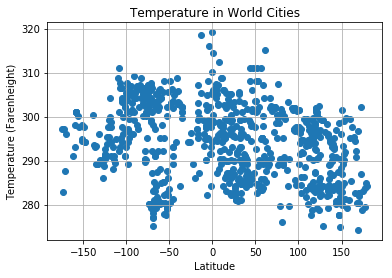

In [8]:
#create plot for latitude / temperature

plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheight)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature Versus Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

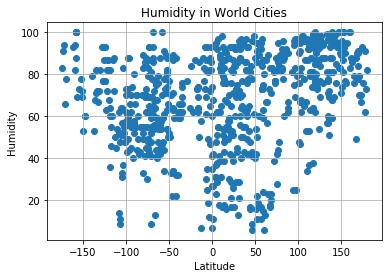

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude versus Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

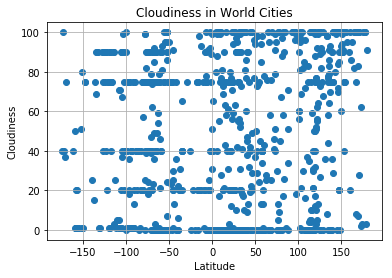

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude versus Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

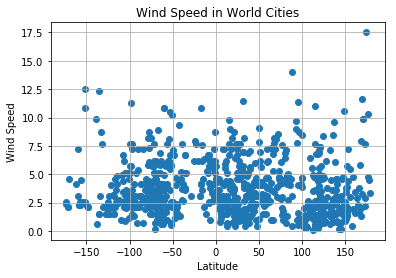

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude versus Wind Speed.png")

# Show plot
plt.show()